In [40]:
# Use this at the start of each algorithm notebook to get the final dataset
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

final_data_path = '../data/final_data.csv'
df = pd.read_csv(final_data_path, parse_dates=['datetime'])

# X and y sets
X = ['demand_5_min_lag','temperature_5_min_lag', 'Is weekday', 'Is weekend', 'regular day', 'public holiday']
y = ['demand']

# Train Data using only 2016 (Jan) - 2020 (Jan) data

df_train = df[df['datetime'] > datetime(2016, 1, 1, 0, 0, 0)]
df_train = df_train[df_train['datetime'] <=  datetime(2020, 1, 31, 0, 0, 0)]
df_train.head()
df_test = df[df['datetime'] > datetime(2020, 1, 31, 0, 0, 0)]

In [41]:
# Import xgbregressor and pyplot
from xgboost import XGBRegressor
from matplotlib import pyplot

# define model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(df_train[X],df_train[y])
yhat = model.predict(df_test[X])

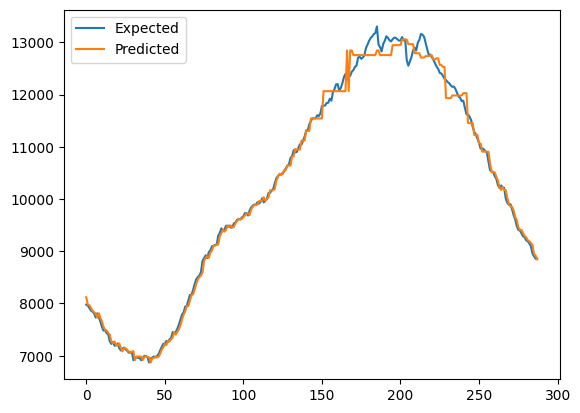

In [42]:
# plot predictions vs actual for 1 day
pyplot.plot(df_test[y][:288].to_numpy(), label='Expected')
pyplot.plot(yhat[:288], label='Predicted')
pyplot.legend()
pyplot.show()

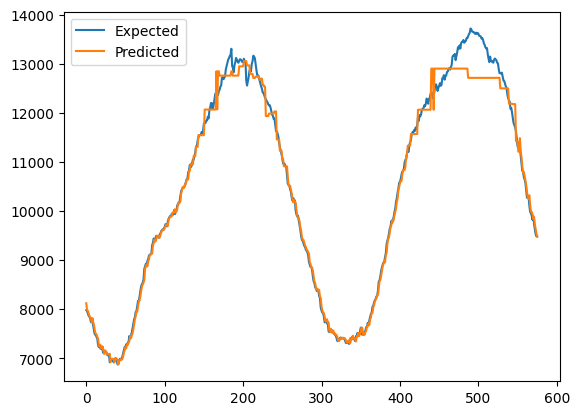

In [43]:
# plot predictions vs actual 2 days
pyplot.plot(df_test[y][:(288*2)].to_numpy(), label='Expected')
pyplot.plot(yhat[:(288*2)], label='Predicted')
pyplot.legend()
pyplot.show()